In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file to inspect sheet names and structure
excel_path = "/content/Comparison results .xlsx"
excel_file = pd.ExcelFile(excel_path)

# Display sheet names to understand the content
sheet_names = excel_file.sheet_names
sheet_names


['Sheet1']

In [ ]:
# Load data from the only sheet: 'Sheet1'
df = excel_file.parse('Sheet1')

# Display the first few rows of the dataframe
df.head()


,Case ID,Baseline nnU-Net DSC,Multi-task DSC,DSC Difference,% DSC Change,Baseline nnU-Net HD (mm),Multi-task HD (mm),HD Difference,% HD Change
0,Hem_00003_0,0.849,0.500,-0.349,-41.107185,2.24,33.76,31.52,1407.142857
1,Hem_00037_1,0.537,0.741,0.204,37.988827,68.37,10.05,-58.32,-85.300570
2,Hem_00045_0,0.885,0.837,-0.048,-5.423729,72.44,17.49,-54.95,-75.855881
3,Hem_00048_1,0.382,0.514,0.132,34.554974,80.29,22.93,-57.36,-71.441026
4,Hem_00051_0,0.931,0.763,-0.168,-18.045113,5.00,5.66,0.66,13.200000


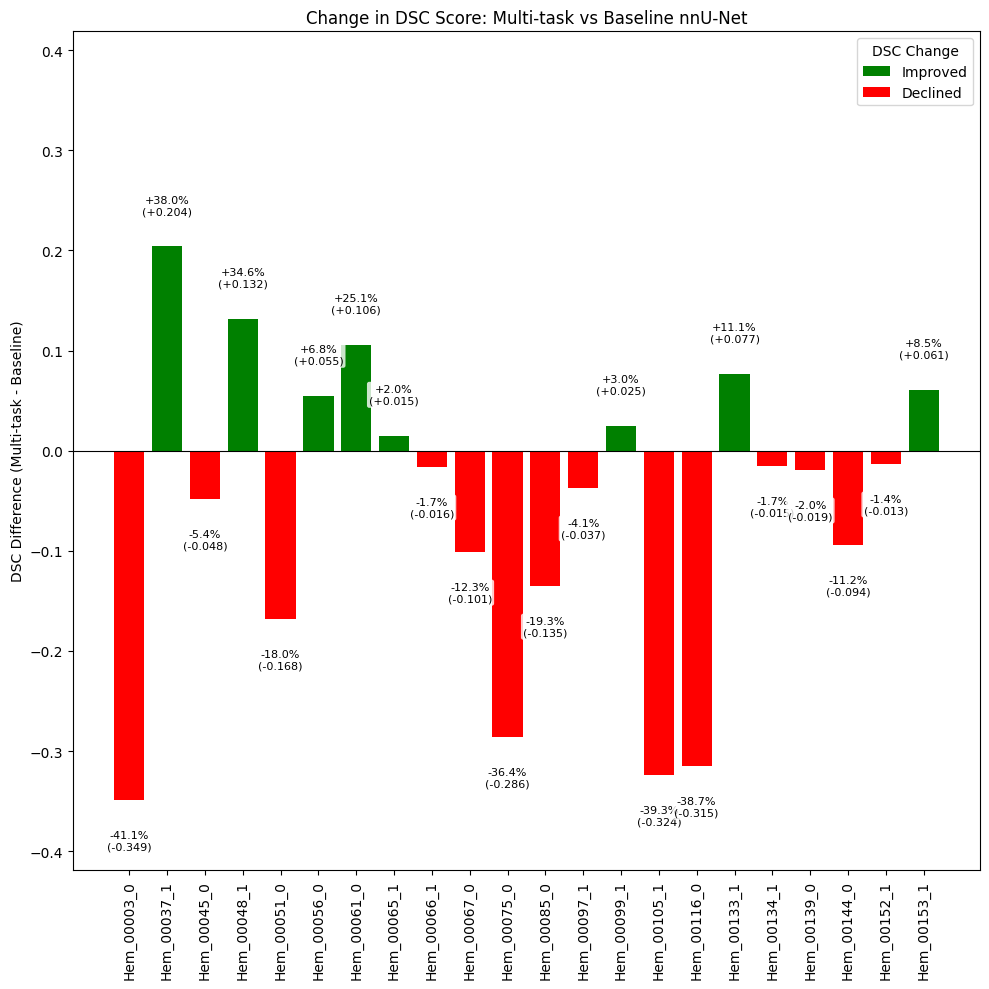

In [ ]:
# Create a square-shaped figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot bars
bars = ax.bar(df['Case ID'], df['DSC Difference'], color=df['color'])

# Annotate with improved spacing
for i, bar in enumerate(bars):
    height = bar.get_height()
    pct = df.loc[i, '% DSC Change']
    label = f"{pct:+.1f}%\n({height:+.3f})"
    offset = 0.03 if height > 0 else -0.03
    va = 'bottom' if height > 0 else 'top'
    ax.text(bar.get_x() + bar.get_width()/2, height + offset,
            label, ha='center', va=va, fontsize=8,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.8))

# Add horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.8)

# Padding to ensure bars don’t cover x-axis
y_lim_buffer = max(abs(df['DSC Difference'].min()), abs(df['DSC Difference'].max())) * 1.2
ax.set_ylim(-y_lim_buffer, y_lim_buffer)

# Labels and formatting
ax.set_ylabel('DSC Difference (Multi-task - Baseline)')
ax.set_title('Change in DSC Score: Multi-task vs Baseline nnU-Net')
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df['Case ID'], rotation=90)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', label='Improved'),
                   Patch(facecolor='red', label='Declined')]
ax.legend(handles=legend_elements, title='DSC Change')

plt.tight_layout()
plt.show()


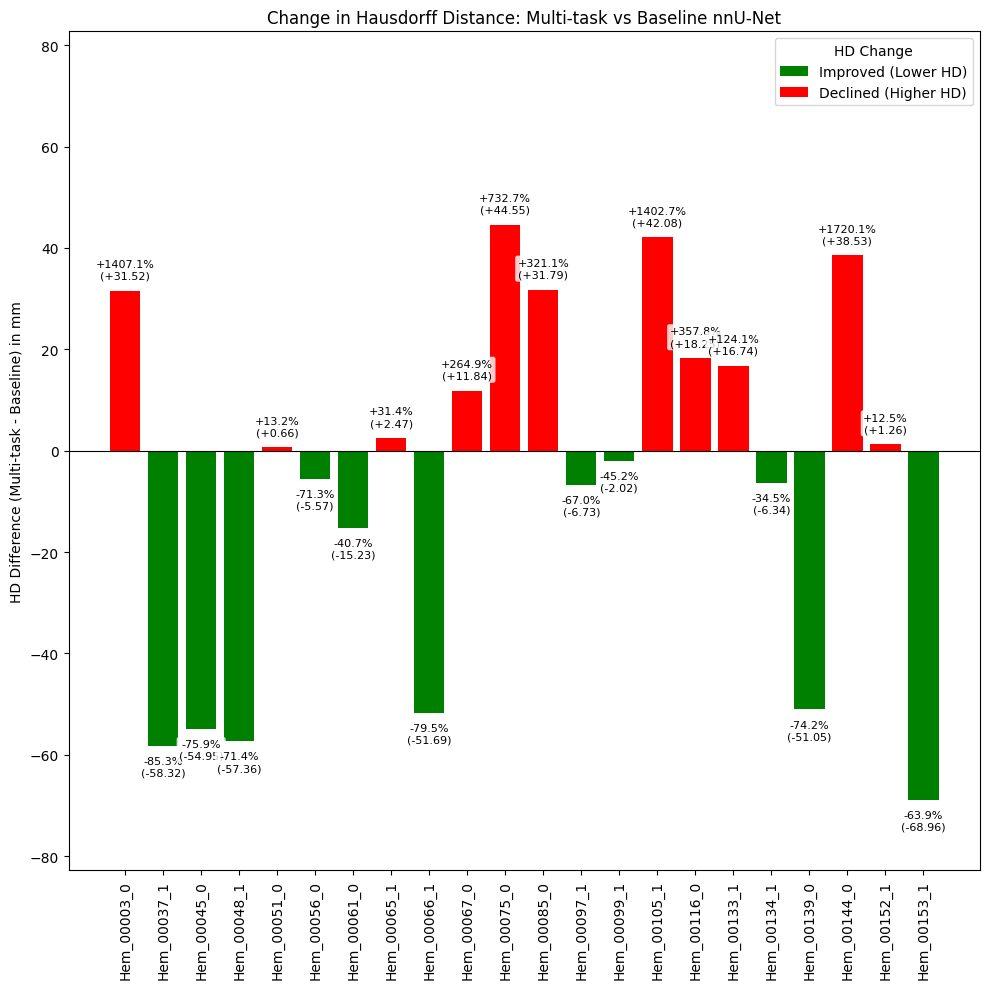

In [ ]:
# Create color and label columns for HD difference
df['HD color'] = df['HD Difference'].apply(lambda x: 'green' if x < 0 else 'red')
df['HD label_group'] = df['HD color'].apply(lambda x: 'Improved' if x == 'green' else 'Declined')

# Create square plot for HD differences
fig, ax = plt.subplots(figsize=(10, 10))

# Plot HD difference bars
bars_hd = ax.bar(df['Case ID'], df['HD Difference'], color=df['HD color'])

# Annotate with percentage and numerical change
for i, bar in enumerate(bars_hd):
    height = bar.get_height()
    pct = df.loc[i, '% HD Change']
    label = f"{pct:+.1f}%\n({height:+.2f})"
    offset = 2 if height > 0 else -2
    va = 'bottom' if height > 0 else 'top'
    ax.text(bar.get_x() + bar.get_width()/2, height + offset,
            label, ha='center', va=va, fontsize=8,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.8))

# Set limits and formatting
hd_lim_buffer = max(abs(df['HD Difference'].min()), abs(df['HD Difference'].max())) * 1.2
ax.set_ylim(-hd_lim_buffer, hd_lim_buffer)
ax.axhline(0, color='black', linewidth=0.8)
ax.set_ylabel('HD Difference (Multi-task - Baseline) in mm')
ax.set_title('Change in Hausdorff Distance: Multi-task vs Baseline nnU-Net')
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df['Case ID'], rotation=90)

# Legend
legend_elements_hd = [Patch(facecolor='green', label='Improved (Lower HD)'),
                      Patch(facecolor='red', label='Declined (Higher HD)')]
ax.legend(handles=legend_elements_hd, title='HD Change')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, roc_curve, auc,
                             classification_report)
import seaborn as sns

# 1) Define or load your data
# ---------------------------------------------------------
# Suppose we have the data from your final "pred_label" vs. "ground_truth" example:
y_true = np.array([0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1])
y_pred = np.array([1,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,1,1,0,0,1,1])

# 2) Compute confusion matrix
# ---------------------------------------------------------
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# 3) Compute classification metrics
# ---------------------------------------------------------
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) else 0
recall = tp / (tp + fn) if (tp + fn) else 0
specificity = tn / (tn + fp) if (tn + fp) else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

# Matthews Correlation Coefficient (MCC)
mcc_numerator = (tp * tn) - (fp * fn)
mcc_denominator = np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
mcc = mcc_numerator / mcc_denominator if mcc_denominator else 0

# Cohen's Kappa
p0 = accuracy  # observed agreement
# Probability of random agreement (pe)
# For binary classification:
#   pe = ( (TP+FP)*(TP+FN) + (TN+FN)*(TN+FP) ) / N^2
N = tp + tn + fp + fn
pe = ((tp+fp)*(tp+fn) + (tn+fn)*(tn+fp)) / (N**2)
kappa = (p0 - pe) / (1 - pe) if (1 - pe) else 0

# ROC / AUC (For a single threshold classifier, we have a single operating point,
# but we can treat y_pred as probabilities = 0 or 1 and see what happens.)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc_value = auc(fpr, tpr)

# 4) Print or store the metrics
# ---------------------------------------------------------
print("Confusion Matrix:\n", cm)
print(f"Accuracy:    {accuracy:.3f}")
print(f"Precision:   {precision:.3f}")
print(f"Recall:      {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1-score:    {f1:.3f}")
print(f"MCC:         {mcc:.3f}")
print(f"Cohen's Kappa: {kappa:.3f}")
print(f"AUC:         {auc_value:.3f}")

# We can also print a full classification report from scikit-learn:
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=3))

# 5) Plot Confusion Matrix
# ---------------------------------------------------------
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred=0','Pred=1'],
            yticklabels=['True=0','True=1'])
plt.title('Confusion Matrix for Multi-Task Model vs. Ground Truth')
plt.ylabel('Ground Truth')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
plt.close()

# 6) Plot a bar chart of key metrics
# ---------------------------------------------------------
metrics_names = ['Accuracy','Precision','Recall','Specificity','F1','MCC','Kappa','AUC']
metrics_vals  = [accuracy, precision, recall, specificity, f1, mcc, kappa, auc_value]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_vals, color='skyblue')
plt.title('Classification Metrics for Multi-Task Model')
plt.ylim([0, 1.05])
# Annotate each bar with value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0,
             height + 0.01,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('classification_metrics.png', dpi=150)
plt.close()

# 7) (Optional) Plot the ROC Curve
# ---------------------------------------------------------
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, marker='o', label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve for Multi-Task Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=150)
plt.close()


Confusion Matrix:
 [[8 3]
 [2 9]]
Accuracy:    0.773
Precision:   0.750
Recall:      0.818
Specificity: 0.727
F1-score:    0.783
MCC:         0.548
Cohen's Kappa: 0.545
AUC:         0.773

Classification Report:

              precision    recall  f1-score   support

           0      0.800     0.727     0.762        11
           1      0.750     0.818     0.783        11

    accuracy                          0.773        22
   macro avg      0.775     0.773     0.772        22
weighted avg      0.775     0.773     0.772        22



=== Baseline ResNet ===
Confusion Matrix:
 [[7 4]
 [4 7]]
Classification Report:
               precision    recall  f1-score   support

           0      0.636     0.636     0.636        11
           1      0.636     0.636     0.636        11

    accuracy                          0.636        22
   macro avg      0.636     0.636     0.636        22
weighted avg      0.636     0.636     0.636        22


=== Multi-Task Model ===
Confusion Matrix:
 [[8 3]
 [2 9]]
Classification Report:
               precision    recall  f1-score   support

           0      0.800     0.727     0.762        11
           1      0.750     0.818     0.783        11

    accuracy                          0.773        22
   macro avg      0.775     0.773     0.772        22
weighted avg      0.775     0.773     0.772        22



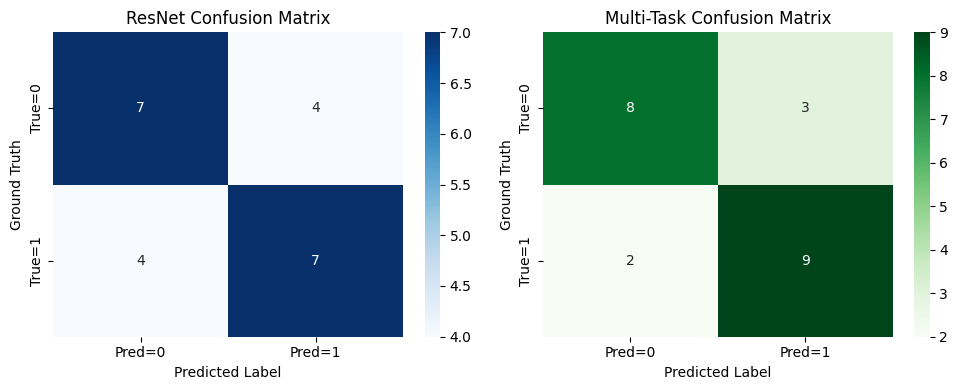

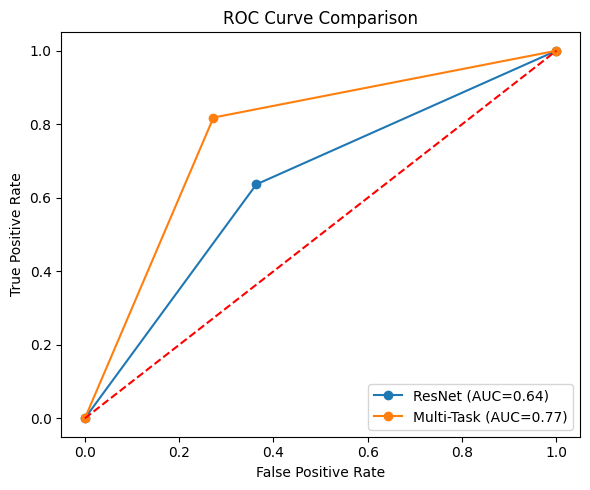

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns

# ======================
# 1) Example data setup
# ======================
# Replace these with your actual ground-truth labels and predictions.
# Must be numpy arrays (or easily cast to them), each of length N (22 in your example).

y_true = np.array([
    0, 1, 0, 1, 0,
    0, 0, 1, 1, 0,
    0, 0, 1, 1, 1,
    0, 1, 1, 0, 0,
    1, 1
])

# Baseline ResNet predictions
y_pred_resnet = np.array([
    1, 1, 0, 0, 1,
    0, 1, 0, 1, 0,
    0, 0, 1, 1, 1,
    1, 1, 1, 0, 0,
    0, 0
])

# Multi-task model predictions
y_pred_multitask = np.array([
    1, 1, 0, 0, 0,
    0, 0, 1, 1, 0,
    1, 0, 1, 1, 0,
    1, 1, 1, 0, 0,
    1, 1
])

# ========================================
# 2) Compute confusion matrices & reports
# ========================================
cm_resnet = confusion_matrix(y_true, y_pred_resnet)
cm_multitask = confusion_matrix(y_true, y_pred_multitask)

print("=== Baseline ResNet ===")
print("Confusion Matrix:\n", cm_resnet)
print("Classification Report:\n", classification_report(y_true, y_pred_resnet, digits=3))

print("\n=== Multi-Task Model ===")
print("Confusion Matrix:\n", cm_multitask)
print("Classification Report:\n", classification_report(y_true, y_pred_multitask, digits=3))

# =======================================
# 3) Plot two confusion matrices side by side
# =======================================
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(
    cm_resnet, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Pred=0', 'Pred=1'], yticklabels=['True=0', 'True=1'],
    ax=axes[0]
)
axes[0].set_title("ResNet Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Ground Truth")

sns.heatmap(
    cm_multitask, annot=True, fmt='d', cmap='Greens',
    xticklabels=['Pred=0', 'Pred=1'], yticklabels=['True=0', 'True=1'],
    ax=axes[1]
)
axes[1].set_title("Multi-Task Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("Ground Truth")

plt.tight_layout()
plt.show()
# To save: plt.savefig("two_confusion_matrices.png", dpi=150)
plt.close()

# =========================
# 4) Plot two ROC curves
# =========================
fpr_resnet, tpr_resnet, _ = roc_curve(y_true, y_pred_resnet)
auc_resnet = auc(fpr_resnet, tpr_resnet)

fpr_multitask, tpr_multitask, _ = roc_curve(y_true, y_pred_multitask)
auc_multitask = auc(fpr_multitask, tpr_multitask)

plt.figure(figsize=(6, 5))
plt.plot(
    fpr_resnet, tpr_resnet, marker='o',
    label=f"ResNet (AUC={auc_resnet:.2f})"
)
plt.plot(
    fpr_multitask, tpr_multitask, marker='o',
    label=f"Multi-Task (AUC={auc_multitask:.2f})"
)

# Plot chance line (diagonal)
plt.plot([0, 1], [0, 1], 'r--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
# To save: plt.savefig("roc_comparison.png", dpi=150)
plt.close()
